<a href="https://colab.research.google.com/github/ValinStudent/CSC-481-Spring25/blob/main/Week_3_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df =  pd.read_csv('studentscores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
X = df.drop('Scores',axis=1)
y = df["Scores"]



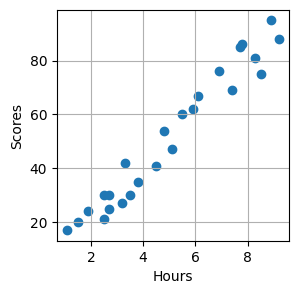

In [7]:
plt.figure(figsize=(3,3))
plt.scatter(X,y)
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.grid(True)
plt.show()

In [8]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=23)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
alpha = model.intercept_
beta = model.coef_

print("alpha: ","{:.2f}".format(alpha))
print("beta", beta)

print(f" y = {alpha} + {beta}x")

alpha:  -0.34
beta [10.28085594]
 y = -0.33798242262133016 + [10.28085594]x


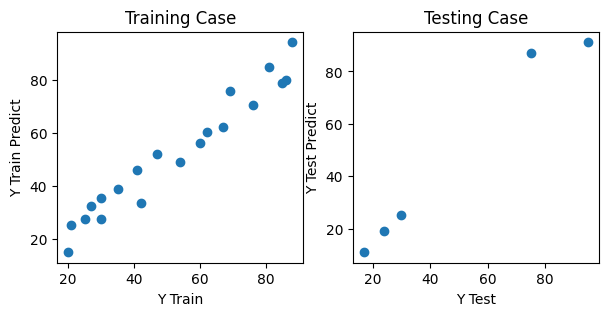

In [12]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
plt.figure(figsize=(7,3))

#Subplot 1
plt.subplot(1,2,1)
plt.scatter(y_train,y_pred_train)
plt.title("Training Case")
plt.xlabel("Y Train")
plt.ylabel("Y Train Predict")
plt.grid=True

#Subplot 2
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_test)
plt.title("Testing Case")

plt.xlabel("Y Test")
plt.ylabel("Y Test Predict")
plt.grid=True

plt.show()

In [13]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)


mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [14]:
performance_df = pd.DataFrame({
    'Metric':['MSE','MAE','MSE','MAE'],
    'DataType':['train','train','test','test'],
    'Value':[mse_train, mae_train, mae_test, mae_test]
    })

performance_df.T

,0,1,2,3
Metric,MSE,MAE,MSE,MAE
DataType,train,train,test,test
Value,26.118428,4.871914,6.271379,6.271379
